In [ ]:
### NLP_Project_Fake_News_TFIDF.ipynb

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#spam_news = pd.read_csv('/content/drive/My Drive/NLP/train_fake_news.csv',encoding='latin-1')
spam_news = pd.read_csv('/content/drive/MyDrive/NLP/train_fake_news.csv',encoding = 'utf-8')
spam_news.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


**Dealing with NaN values**

In [7]:
news_combine = spam_news.copy()
news_combine['news'].isnull().values.any()

True

In [8]:
news_combine['news'] = news_combine['news'].replace(np.nan, '', regex=True)
news_combine['news'].isnull().values.any()

False

In [27]:
# Only taking news and label columns for processing
news_eda = news_combine.copy()
news_eda.drop(columns=['id','headline','written_by','Unnamed: 0'],axis=1,inplace=True)

In [28]:
news_eda.head()

,news,label
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,HOUSTON — Venezuela had a plan. It was a ta...,0
2,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,Finian Cunningham has written extensively on...,1


In [29]:
print ('Shape = >',news_eda.shape)

Shape = > (20800, 2)


In [30]:
#Label coding 0 and 1
news_eda['label'].replace({0:'not fake',1:'fake'},inplace=True)

In [31]:
print ('ham and spam counts','\n',news_eda.label.value_counts())

ham and spam counts 
 fake        10413
not fake    10387
Name: label, dtype: int64


*Note: Above we can clearly see that target value(label) are imballanced*

In [33]:
#Ratio
print ('fake ratio = ', round(len(news_eda[news_eda['label']=='fake']) / len(news_eda.label),2)*100,'%')
print ('not fake ratio  = ', round(len(news_eda[news_eda['label']=='not fake']) / len(news_eda.label),2)*100,'%')

fake ratio =  50.0 %
not fake ratio  =  50.0 %


In [35]:
#New column for Length of message
news_eda['length'] = news_eda.news.str.len()
news_eda.head(4)

,news,label,length
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",not fake,7936
1,HOUSTON — Venezuela had a plan. It was a ta...,not fake,6112
2,"Sunday on ABC’s “This Week,” while discussing ...",not fake,425
3,"AUGUSTA, Me. — The beleaguered Republican g...",not fake,6516


In [36]:
# Convert all messages to lower case
news_eda['news'] = news_eda['news'].str.lower()

In [37]:
news_eda.head()

,news,label,length
0,"washington — in sonny perdue’s telling, geo...",not fake,7936
1,houston — venezuela had a plan. it was a ta...,not fake,6112
2,"sunday on abc’s “this week,” while discussing ...",not fake,425
3,"augusta, me. — the beleaguered republican g...",not fake,6516
4,finian cunningham has written extensively on...,fake,9164


In [38]:
#Label coding 0 and 1
news_eda['label'].replace({'not fake':0,'fake':1},inplace=True)

In [39]:
news_eda.head(50)

,news,label,length
0,"washington — in sonny perdue’s telling, geo...",0,7936
1,houston — venezuela had a plan. it was a ta...,0,6112
2,"sunday on abc’s “this week,” while discussing ...",0,425
3,"augusta, me. — the beleaguered republican g...",0,6516
4,finian cunningham has written extensively on...,1,9164
5,taming the corporate media beast whatever the ...,1,15285
6,the state of new jersey says you can’t eat the...,0,4159
7,advocates say prison officials at the kilby co...,1,6311
8,people have made up their minds on president.\...,1,782
9,leave a reply \ntoni emerson – when we fall in...,1,6386


In [40]:
news_eda['news'][21]

'beauty contracts have long been a brass ring for celebrities: acknowledgment of their rising profiles that also provides additional income and the chance to tap wider audiences. so what does it mean that covergirl’s latest face (joining the ranks of zendaya, katy perry, pink and more) is   …     a boy? and a noncelebrity boy at that? he is james charles, 17, a high school senior from bethlehem, n. y. who lives with his parents and a younger brother and does makeup for friends in his spare time (at no charge). in the past year or so, mr. charles has amassed nearly 650, 000 followers on his instagram account and more than 90, 000 subscribers on his youtube channel, where he posts tutorials for creating fake freckles or layering chunky glitter around the eyes. he gained attention last month when he posted to social media about retaking his senior photos because he didn’t like how the highlighter on his cheekbones looked in the originals. for the second set, mr. charles brought his own ri

# Text Cleaning 

**Regular Expressions**

In [41]:
import re
import string
import nltk
from nltk.corpus import  stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','us'])

In [42]:
def preprocess_text(text):
    text = text.lower()
    # Replace money symbols 
    text = re.sub(r'£|\$', ' ',text)
    # remove punctuations 
    text =  re.sub(r'[^\w\d\s]','',text)
    # remove numbers 
    text = re.sub(r'\d+(\.\d+)?', ' ',text)
    # Remove spacial char
    text = re.sub(r'[%#@$&!+|ð¦±_]','',text)          
    # Replace whitespace between terms with a single space
    text = re.sub(r'\s+', ' ',text)
    # Remove leading and trailing whitespace
    text = re.sub(r'^\s+|\s+?$', '',text)
    # Removes words of up to 3 characters entirely
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # remove STOP words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

news_eda["news_cleaned"] = news_eda.news.astype(str).apply(preprocess_text)

In [43]:
news_eda["news_cleaned"][1]

'houston venezuela plan tactical approach designed specifically take lionel messi dangerous argentine attackers game applying forward pressure forcing argentina make long hopeful passes worked seven minutes eighth minute messi conjured kind technical genius compels observers call best soccer player world artfully lifting perfect pass yards gonzalo higuaín one striking touch higuaín converted goal first argentinas victory saturday copa américa centenario quarterfinal decisive moment like many others experienced opponents hoping stop messi venezuelas carefully conceived defensive tactics laid waste stroke genius changes schemes venezuela coach rafael dudamel said incredible pass messi scored messi frequently brilliant strokes like one united states turn try find way suppress united states earned spot tuesdays copa américa semifinal nrg stadium beating ecuador dubious prize awaiting messi argentinas mesmerizing dribbling passing shooting virtuoso special united states coach jurgen klinsma

In [ ]:
### STOP word removal function
# from stop_words import get_stop_words
# stop_words = get_stop_words('en')
# def remove_stopWords(s):
#     s = ' '.join(word for word in s.split() if word not in stop_words)
#     return s
# df.loc[:,"reviewText"] = df.reviewText.apply(lambda x: remove_stopWords(x))

### another removing way
# df.loc[:,"reviewText"] = df.reviewText.apply(lambda x : " ".join(re.findall('[\w]+',x)))
# df.loc[:,"reviewText"] = df.reviewText.apply(lambda x : str.lower(x))

In [44]:
# New column (clean_length) after puncuations,stopwords removal
news_cleaned = news_eda.copy()
news_cleaned['clean_length'] = news_cleaned.news_cleaned.str.len()
news_cleaned.head()

,news,label,length,news_cleaned,clean_length
0,"washington — in sonny perdue’s telling, geo...",0,7936,washington sonny perdues telling georgians gro...,5239
1,houston — venezuela had a plan. it was a ta...,0,6112,houston venezuela plan tactical approach desig...,4056
2,"sunday on abc’s “this week,” while discussing ...",0,425,sunday abcs week discussing republican plan re...,270
3,"augusta, me. — the beleaguered republican g...",0,6516,augusta beleaguered republican governor maine ...,4360
4,finian cunningham has written extensively on...,1,9164,finian cunningham written extensively internat...,6582


In [45]:
# Total length removal
print ('Before Cleaning Length', news_cleaned.length.sum())
print ('After Cleaning Length', news_cleaned.clean_length.sum())

Before Cleaning Length 94518924
After Cleaning Length 64061099


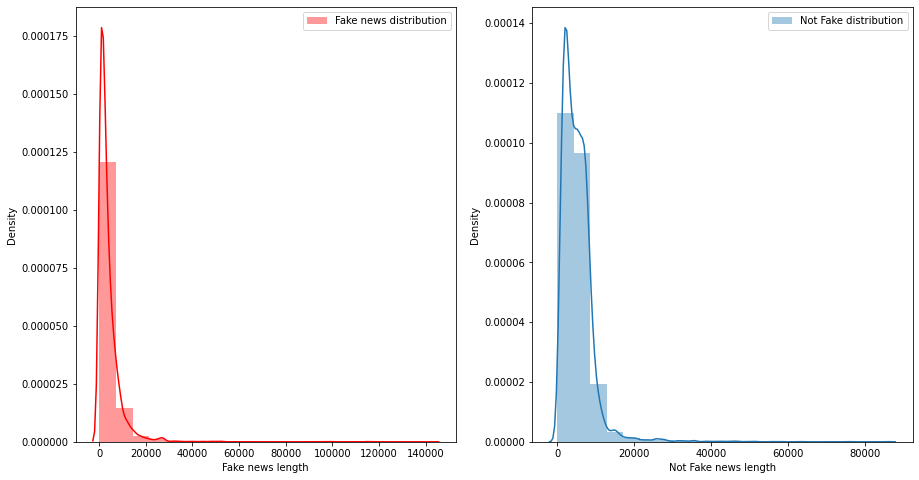

In [46]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(news_cleaned[news_cleaned['label']==1]['length'],bins=20,ax=ax[0],label='Fake news distribution',color='r')

ax[0].set_xlabel('Fake news length')
ax[0].legend()

sns.distplot(news_cleaned[news_cleaned['label']==0]['length'],bins=20,ax=ax[1],label='Not Fake distribution')
ax[1].set_xlabel('Not Fake news length')
ax[1].legend()

plt.show()

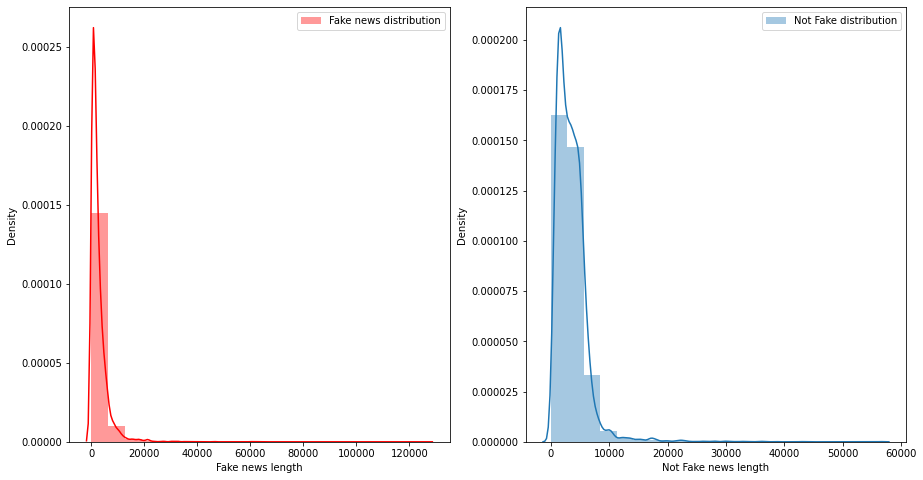

In [47]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(news_cleaned[news_cleaned['label']==1]['clean_length'],bins=20,ax=ax[0],label='Fake news distribution',color='r')

ax[0].set_xlabel('Fake news length')
ax[0].legend()

sns.distplot(news_cleaned[news_cleaned['label']==0]['clean_length'],bins=20,ax=ax[1],label='Not Fake distribution')
ax[1].set_xlabel('Not Fake news length')
ax[1].legend()

plt.show()

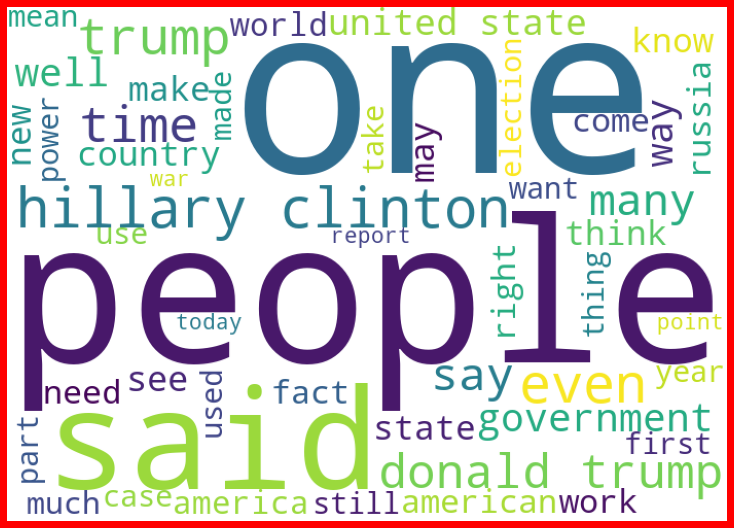

In [48]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud

fake = news_cleaned['news_cleaned'][news_cleaned['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

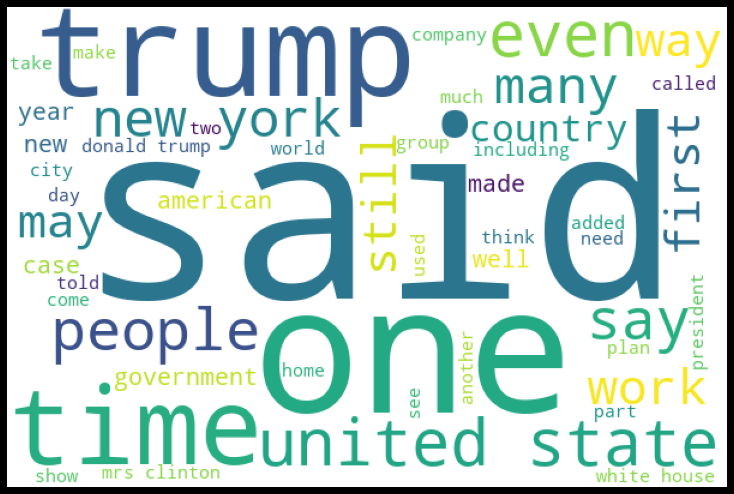

In [49]:
#Getting sense of loud words in ham 

not_fake = news_cleaned['news_cleaned'][news_cleaned['label']==0]
not_fake_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(not_fake))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(not_fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**After Cleaning Now Convert Corpus in BOW (Docuents Matrix wrt Words)**

1. Convert text into vectors using TF-IDF


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features_TFIDF = tf_vec.fit_transform(news_cleaned['news_cleaned'])

**Split data into DV & IV**

In [51]:
X = features_TFIDF
Y = news_cleaned['label']

# Modeling

In [88]:
# Implement MultinomialNB Classifier
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB() 

In [89]:
# Implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,criterion='entropy')

**Split data using    train_test_split**

In [ ]:
##The parameter 'shuffle' is set to true, thus the data set will be randomly shuffled before the split. The parameter 'stratify' is recently added to Sci-kit Learn from v0.17 , it is essential when dealing with imbalanced data sets, such as the spam classification example. It makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to the parameter stratify.
##For example, if the variable y is a binary categorical variable with values 0 and 1 and there are 10% of zeros and 90% of ones, stratify=y will make sure that your random split has 10% of 0's and 90% of 1's.

# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,shuffle = True,stratify = Y)

**Stratified k-fold cross validation**

In [54]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,Y): 
    print("Train:", train_index, "Validation:", test_index) 
    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]

Train: [ 4156  4158  4162 ... 20797 20798 20799] Validation: [   0    1    2 ... 4159 4160 4161]
Train: [    0     1     2 ... 20797 20798 20799] Validation: [4156 4158 4162 ... 8327 8328 8329]
Train: [    0     1     2 ... 20797 20798 20799] Validation: [ 8301  8304  8310 ... 12522 12523 12525]
Train: [    0     1     2 ... 20797 20798 20799] Validation: [12440 12441 12443 ... 16739 16740 16745]
Train: [    0     1     2 ... 16739 16740 16745] Validation: [16533 16534 16535 ... 20797 20798 20799]


**Train The Model**

In [55]:
NB_model.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
RF_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
!pip install xgboost

In [69]:
# from xgboost import XGBClassifier
# #lf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)
# XGB_model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)
# XGB_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Hyperparameter Tuning

In [93]:
#from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
gsearch1.best_params_,gsearch1.best_score_

KeyboardInterrupt: ignored

**Model Prediction**

In [58]:
y_pred= NB_model.predict(X_test)
#y_pred= RF_model.predict(X_test)
#y_pred= XGB_model.predict(X_test)

# Evaluate The Model 

**Accuracy**

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#print ('Final score = > ', accuracy_score(Y_test,y_pred))   ## testing Accuracy

print("NB Training Accuracy:",NB_model.score(X_train,Y_train))
print("NB Testing Accuracy:",NB_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")
print("RF Training Accuracy:",RF_model.score(X_train,Y_train))
print("RF Testing Accuracy:",RF_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")
print("XGB Training Accuracy:",XGB_model.score(X_train,Y_train))
print("XBG Testing Accuracy:",XGB_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")

NB Training Accuracy: 0.8674879807692307
NB Testing Accuracy: 0.828125
--------------------------------------------------------------------
RF Training Accuracy: 0.9999399038461538
RF Testing Accuracy: 0.9024038461538462
--------------------------------------------------------------------
XGB Training Accuracy: 0.9639423076923077
XBG Testing Accuracy: 0.9399038461538461
--------------------------------------------------------------------


**Evaluation Matrix** 

[[2064   13]
 [ 702 1381]]


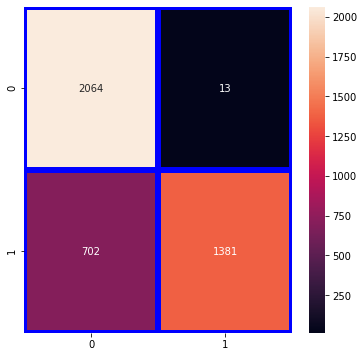

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2077
           1       0.99      0.66      0.79      2083

    accuracy                           0.83      4160
   macro avg       0.87      0.83      0.82      4160
weighted avg       0.87      0.83      0.82      4160



In [60]:
Ya = Y_test  # Real Value
Yp = NB_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(Ya,Yp)
print(cm_NB)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_NB,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

In [61]:
cm_NB = confusion_matrix(Ya,Yp)
TP = cm_NB[0][0]
FP = cm_NB[0][1]
FN = cm_NB[1][0]
TN = cm_NB[1][1]

In [62]:
print(TP)
print(FP)
print(FN)
print(TN)

2064
13
702
1381


In [63]:
precision = TP/(TP+FP)
print("Precision = ",precision)
recall = TP/(TP+FN)
print("Recall = ",recall)

Precision =  0.993740972556572
Recall =  0.7462039045553145


In [64]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.828125

In [65]:
f1_score = 2*((precision*recall)/(precision+recall))
print("f1_score = ",f1_score)

f1_score =  0.852364237043155


In [66]:
from sklearn.metrics import roc_auc_score ,roc_curve
fpr,tpr,threshold = roc_curve(Ya,Yp)

In [67]:
auc = roc_auc_score(Ya,Yp)

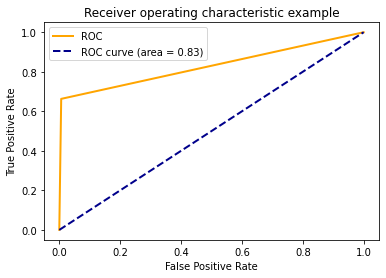

In [68]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='ROC',lw=2)
plt.plot([0,1],[0,1],color='darkblue',lw=2,linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()

[[1934  143]
 [ 263 1820]]


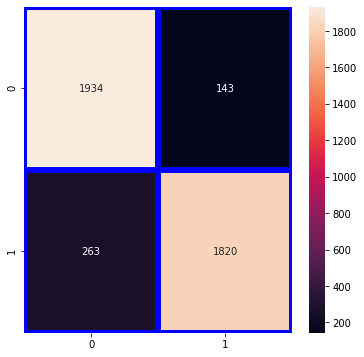

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2077
           1       0.93      0.87      0.90      2083

    accuracy                           0.90      4160
   macro avg       0.90      0.90      0.90      4160
weighted avg       0.90      0.90      0.90      4160



In [71]:
Ya = Y_test  # Real Value
Yp = RF_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(Ya,Yp)
print(cm_RF)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_RF,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[1922  155]
 [  95 1988]]


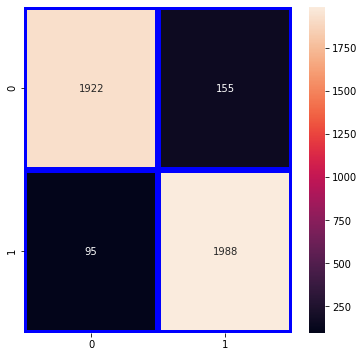

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2077
           1       0.93      0.95      0.94      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160



In [72]:
Ya = Y_test  # Real Value
Yp = XGB_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_XGB = confusion_matrix(Ya,Yp)
print(cm_XGB)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_XGB,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

In [80]:
cm_XGB = confusion_matrix(Ya,Yp)
TP = cm_XGB[0][0]
FP = cm_XGB[0][1]
FN = cm_XGB[1][0]
TN = cm_XGB[1][1]

In [81]:
print(TP)
print(FP)
print(FN)
print(TN)

1922
155
95
1988


In [82]:
precision = TP/(TP+FP)
print("Precision = ",precision)
recall = TP/(TP+FN)
print("Recall = ",recall)

Precision =  0.9253731343283582
Recall =  0.9529003470500743


In [83]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.9399038461538461

In [84]:
f1_score = 2*((precision*recall)/(precision+recall))
print("f1_score = ",f1_score)

f1_score =  0.9389350268685882


In [85]:
from sklearn.metrics import roc_auc_score ,roc_curve
fpr,tpr,threshold = roc_curve(Ya,Yp)

In [86]:
auc = roc_auc_score(Ya,Yp)

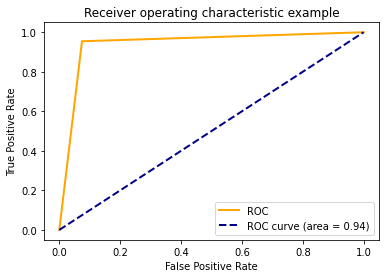

In [87]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='ROC',lw=2)
plt.plot([0,1],[0,1],color='darkblue',lw=2,linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()

**Use K-Fold Cross Validation**

In [ ]:
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(NB_model, X, Y, cv=5))

In [ ]:
# import numpy as np
# print(np.mean(cross_val_score(NB_model, X, Y, cv=10)))

# Test your Model by giving test data at your own

In [76]:
# ham:0  , spam:1
tests=['content length numbr apple iss research center a us dollers numbr million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing', 
       'multi part message mime format _ nextpart _ numbr _ numbr _ numbrbdnumbr numbrffnumbrenumbr content type multipart alternative boundary _ nextpart _ numbr _ numbra _ numbrbdnumbr numbrffnumbrenumbr _ nextpart _ numbr _ numbra _ numbrbdnumbr numbrffnumbrenumbr content type text plain charset iso numbr numbr content transfer encoding numbrbit scotland net make save dollers dollers dollers dollers dollers world wide web free web access free web access free web access note though isp service initially available uk referral agent opportunity available worldwide overseas agents',
      'watch latest shows on netflix for free!!',
      'Pls Share your mobile number and OTP and get free movie bouchers!',
      'note wish send e mail anyone want please send e mail removenumbr yahoo com removed promptly internet success toolbox complete marketing software package available anywhere receive cd rom numbr stealth mass mailer dollers numbr numbr value unique first kind software allows easily send numbr numbr e mail messages hour simply enough making single connection internet using standard modem connecting either numbr different mail servers single mail server numbr times easy use software designed basic computer user understand easy imputing mail server selecting list e mail recipients send inserting e mail address adding subject line selecting sales letter pressing send numbr e mail pro extractor dollers numbr numbr value one kind software program designed manage clean list e mail addresses purge duplicates manage removes delete undeliverables also separate categorize list e mail addresses domain names e mail pro version numbr numbr bulk e mail loader also imports simple text files anyone downlods',
      'Congratulations! you won $1000 lottary , Pls Share your mobile number and OTP and get free movie bouchers!',
       'hello all you all have to come office tomorrow with no delay ,and sunday will be no close this time ,no more holidays',
       'You got plcaced in MNC company with good pakage pls share your Mobile number bank details and OTP details for verification',
       'congratulations! you own gifts price, your bank account has been credited with $10000 pls tell the Personel bank details mobile numner , Otp and got more winning price ',
       'Venezuela had a plan. It was a tactical approach, designed specifically to take Lionel Messi and the other dangerous Argentine attackers out of the game by applying forward pressure and forcing Argentina to make long, hopeful passes. And it worked for about seven minutes. But in the eighth minute, Messi conjured the kind of technical genius that compels most observers to call him the best soccer player in the world, artfully lifting a perfect pass about 15 yards in to Gonzalo Higuaín. With one striking touch, Higuaín converted it into a goal, the first in Argentina’s   victory on Saturday in a Copa América Centenario quarterfinal. In that decisive moment, like so many others experienced by opponents hoping to stop Messi, all of Venezuela’s carefully conceived defensive tactics were laid to waste. “They have that stroke of genius that changes all your schemes,” Venezuela Coach Rafael Dudamel said. “They had an incredible pass from Messi, and they scored. ” Messi has frequently had brilliant strokes like that one, and now it is the United States’ turn to try to find a way to suppress them. The United States earned a spot in Tuesday’s Copa América semifinal here at NRG Stadium by beating Ecuador, but the dubious prize awaiting them is Messi, Argentina’s mesmerizing,    dribbling, passing and shooting virtuoso. “This is special,” United States Coach Jurgen Klinsmann said. “Absolutely, it’s special to play against these type of players. When you get the opportunity to play against one of the biggest players in the world, you want to raise your game you want to enjoy it. ” The United States has had few chances to play a meaningful game against a star of Messi’s caliber who also played on such a quality team. (FIFA has Argentina ranked No. 1 in the world.) Tuesday’s match will be the rough equivalent of taking on Pelé’s Brazil in 1970 or Ferenc Puskas’s Hungary in 1954 or the team led by that other Argentine soccer genius, Diego Maradona, in 1986. As Klinsmann noted, the United States was seconds from beating Portugal at the 2014 World Cup until Cristiano Ronaldo  —   who has at times been considered Messi’s equal  —   provided a gorgeous cross that enabled Portugal to tie the game. Over the years, the United States has faced the likes of England’s Wayne Rooney at the 2010 World Cup, Brazil’s Ronaldinho at the 1999 Confederations Cup and Italy’s Paolo Maldini, one of the best left backs in history, at the 1990 World Cup, as well as Brazil’s duo of Bebeto and Romário and Romania’s Gheorghe Hagi, some of the top players of their era, at the 1994 World Cup. At the 1934 World Cup, the United States lost by   to Italy, and one of the goals was scored by Giuseppe Meazza, whom some historians consider the best player Italy has produced. At the 1998 World Cup, Klinsmann scored against the United States toward the end of his prolific career as one of the most dangerous attackers for the world champions West Germany and Germany. But in recent memory, there is nothing that quite resembles Tuesday’s challenge. Two years ago Ronaldo did not enjoy the kind of team support from Portugal that Messi does now with Javier Mascherano, Ángel Di María (when healthy) Sergio Agüero and particularly Higuaín, Argentina’s penetrating No. 9, who scored twice against Venezuela. Spend too much time focusing on either Messi or Higuaín, and the other could act decisively. “We have two strikers who are really exceptional,” Gerardo Martino, Argentina’s coach, said after Saturday’s match. “I cannot repeat it enough I really feel this. People in Argentina have a hard time accepting the quality of soccer players that we have. We have two No. 9s, and we proceed with what we feel is best. ” Martino watched Venezuela hack down Messi several times in the quarterfinal game and said the United States would certainly use every possible means to stop him. “I just hope that every possible way is a legal way,” he said at a news conference Monday. As superb as Messi is, some believe that he will not have achieved his true potential until he wins a major trophy for Argentina, just as he has numerous times for the club team Barcelona. But after tying Gabriel Batistuta’s record of 54 international goals for Argentina on Saturday, Messi said he felt no pressure. “I’m always going to be in there,” Messi said. “I’m very calm. ” In Maradona’s time, Argentina also had strong supporting players like Claudio Caniggia, Jorge Valdano, Jorge Burruchaga and later Batistuta. But like Messi, Maradona was the team’s clear supremo. When the United States beat Argentina,   at the 1995 Copa América, Maradona was no longer playing for his country. But Klinsmann had the chance to play against Maradona several times. In the 1990 World Cup, West Germany beat Maradona’s Argentina,   in a dismal final in Rome. “You are talking about two wonderful players, the best in the world in their time,” Klinsmann said, referring to Maradona and Messi. “It’s now Messi’s time, and when I had the opportunity to play many games against Maradona, it was Maradona’s time. We all admire these players. But there are also ways to stop them. I am not the type of person who pulls out old stories and tells the players how we did it. That’s not me, but there are ways to play against these wonderful players. ” Klinsmann showed his team video scouting reports of Messi and Argentina and said his players needed to give 10 to 15 percent more in order to achieve an upset Tuesday. But the Argentines are not infallible, he added. They have not won a major tournament in over 20 years, and Messi’s team has come up short twice in the last two years. Germany beat La Albiceleste, as Argentina is known, in the final of the 2014 World Cup, and Chile won in the final of last year’s Copa América. Both times, it took champions to beat Messi and Argentina. “You guys are probably worrying more about Messi than we are,” the United States’ captain, Michael Bradley, told reporters. “Very good player. That’s also probably an understatement. It’s still a soccer game with 11 of their guys against 11 of our guys.']
for test in tests:
    result = XGB_model.predict(tf_vec.transform([test.lower()]))
    print(test," : ",result)

content length numbr apple iss research center a us dollers numbr million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing  :  [1]
multi part message mime format _ nextpart _ numbr _ numbr _ numbrbdnumbr numbrffnumbrenumbr content type multipart alternative boundary _ nextpart _ numbr _ numbra _ numbrbdnumbr numbrffnumbrenumbr _ nextpart _ numbr _ numbra _ numbrbdnumbr numbrffnumbrenumbr content type text plain charset iso numbr numbr content transfer encoding numbrbit scotland net make save dollers dollers dollers dollers dollers world wide web free web access free web access free web access note though isp service initially available uk referral agent opportunity available worldwide overseas agents  :  [1]
watch latest shows on netflix 

In [75]:
print(news_combine['news'][1])

HOUSTON  —   Venezuela had a plan. It was a tactical approach, designed specifically to take Lionel Messi and the other dangerous Argentine attackers out of the game by applying forward pressure and forcing Argentina to make long, hopeful passes. And it worked for about seven minutes. But in the eighth minute, Messi conjured the kind of technical genius that compels most observers to call him the best soccer player in the world, artfully lifting a perfect pass about 15 yards in to Gonzalo Higuaín. With one striking touch, Higuaín converted it into a goal, the first in Argentina’s   victory on Saturday in a Copa América Centenario quarterfinal. In that decisive moment, like so many others experienced by opponents hoping to stop Messi, all of Venezuela’s carefully conceived defensive tactics were laid to waste. “They have that stroke of genius that changes all your schemes,” Venezuela Coach Rafael Dudamel said. “They had an incredible pass from Messi, and they scored. ” Messi has frequen

Note: Here XGB Works quite good and classify Fake and Not_fake news properly 